In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [3]:
import yfinance as yf

In [4]:
df=yf.download('GLD','2010-1-1','2021-9-4',auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [10]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-12-31,107.980003,108.110001,107.239998,107.309998,9124700
2010-01-04,109.820000,110.139999,109.309998,109.800003,16224100
2010-01-05,109.879997,110.389999,109.260002,109.699997,14213100
2010-01-06,110.709999,111.769997,110.410004,111.510002,24981900
2010-01-07,111.070000,111.290001,110.620003,110.820000,13609800


In [11]:
df=df[['Close']]

In [12]:
df=df.dropna()

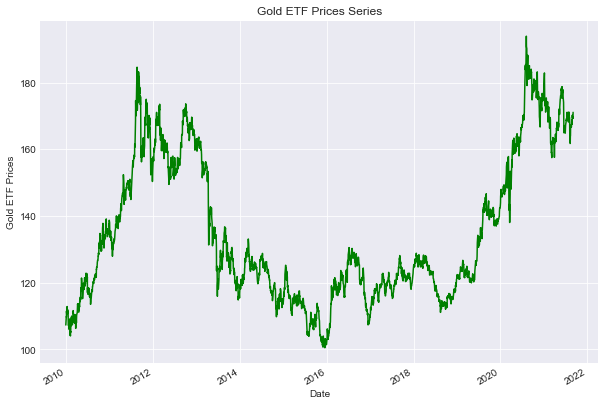

In [13]:
df.Close.plot(figsize=(10,7),color='g')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Prices Series")
plt.show()

In [50]:
df['D_3']=df['Close'].rolling(window=3).mean()
df['D_9']=df['Close'].rolling(window=9).mean()
df['next_day_price']=df['Close'].shift(-1)
df.head()

,Close,D_3,D_9,next_day_price
Date,,,,
2010-01-13,111.540001,NaN,NaN,112.029999
2010-01-14,112.029999,NaN,NaN,110.860001
2010-01-15,110.860001,111.476667,NaN,111.519997
2010-01-19,111.519997,111.469999,NaN,108.940002
2010-01-20,108.940002,110.440000,NaN,107.370003


In [51]:
df=df.dropna()
df.head()

,Close,D_3,D_9,next_day_price
Date,,,,
2010-01-26,107.559998,107.403333,109.385556,106.529999
2010-01-27,106.529999,107.190000,108.828889,106.480003
2010-01-28,106.480003,106.856667,108.212223,105.959999
2010-01-29,105.959999,106.323334,107.667778,108.349998
2010-02-01,108.349998,106.930000,107.315556,109.129997


In [52]:
X=df[['D_3','D_9']]
y=df['next_day_price']

In [53]:
t=0.8
t=int(t*len(df))

In [54]:
X_train=X[:t]
y_train=y[:t]

X_test=X[t:]
y_test=y[t:]

In [55]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression().fit(X_train,y_train)

In [56]:
print("Linear Regression Model")
print("Gold ETF Price = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)"%(linear.coef_[0],linear.coef_[1],linear.intercept_))

Linear Regression Model
Gold ETF Price = 1.21 * 3 Days Moving Average (x1) + -0.21 * 9 Days Moving Average (x2) + 0.60 (constant)


In [57]:
predicted_price=linear.predict(X_test)
predicted_price=pd.DataFrame(predicted_price,index=y_test.index,columns=['price'])
predicted_price

,price
Date,
2019-05-09,121.218683
2019-05-10,121.293101
2019-05-13,121.967328
2019-05-14,122.426145
2019-05-15,122.754860
...,...
2021-08-26,167.864539
2021-08-27,168.414605
2021-08-30,169.111596


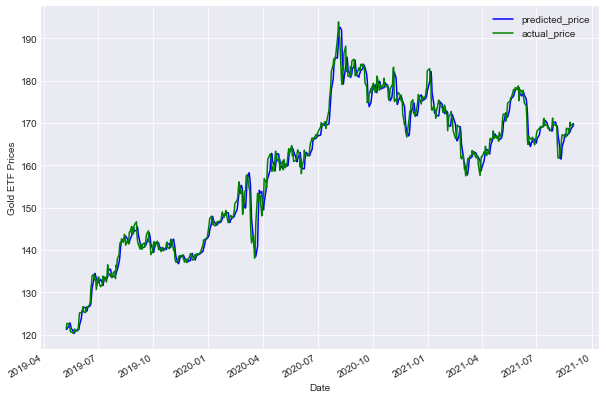

In [58]:
predicted_price.plot(figsize=(10,7), color = 'b')
y_test.plot(color = 'g')
plt.legend(['predicted_price','actual_price'])
plt.ylabel("Gold ETF Prices")
plt.show()

In [59]:
r2_score=linear.score(X[t:],y[t:])*100
float("{0:.2f}".format(r2_score))

98.36

In [60]:
gold = pd.DataFrame()

gold['price'] = df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

In [61]:
gold.tail()

,price,predicted_price_next_day,actual_price_next_day,gold_returns
Date,,,,
2021-08-26,167.669998,167.864539,170.190002,0.015030
2021-08-27,170.190002,168.414605,169.350006,-0.004936
2021-08-30,169.350006,169.111596,169.690002,0.002008
2021-08-31,169.690002,169.864040,169.699997,0.000059
2021-09-01,169.699997,169.593427,169.250000,NaN


In [62]:
gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)
gold.head()

,price,predicted_price_next_day,actual_price_next_day,gold_returns,signal
Date,,,,,
2019-05-09,121.199997,121.218683,121.430000,0.001898,0
2019-05-10,121.430000,121.293101,122.669998,0.010212,1
2019-05-13,122.669998,121.967328,122.459999,-0.001712,1
2019-05-14,122.459999,122.426145,122.389999,-0.000572,1
2019-05-15,122.389999,122.754860,121.510002,-0.007190,1


In [63]:
gold['signal']=np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)

In [64]:
gold['actual_price_next_day'] = gold.price.shift(-1)
gold['actual_signal'] = np.where(gold.actual_price_next_day.shift(1) < gold.actual_price_next_day,1,0)
gold.tail()

,price,predicted_price_next_day,actual_price_next_day,gold_returns,signal,actual_signal
Date,,,,,,
2021-08-26,167.669998,167.864539,170.190002,0.015030,0,1
2021-08-27,170.190002,168.414605,169.350006,-0.004936,1,0
2021-08-30,169.350006,169.111596,169.690002,0.002008,1,1
2021-08-31,169.690002,169.864040,169.699997,0.000059,1,1
2021-09-01,169.699997,169.593427,NaN,NaN,0,0


In [65]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(gold['actual_signal'], gold['signal'])
df1 = pd.DataFrame(array, index = ['No Position','Buy'], columns = ['No Position','Buy'])

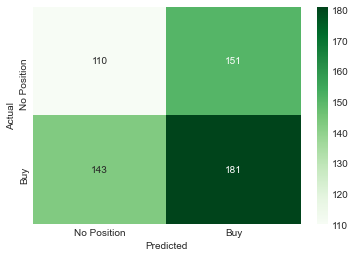

In [66]:
import seaborn as sns
sns.heatmap(df1,annot=True,cmap='Greens',fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [67]:
from sklearn.metrics import classification_report
print(classification_report(gold['actual_signal'], gold['signal'], target_names=['No Position','Buy']))

              precision    recall  f1-score   support

 No Position       0.43      0.42      0.43       261
         Buy       0.55      0.56      0.55       324

    accuracy                           0.50       585
   macro avg       0.49      0.49      0.49       585
weighted avg       0.50      0.50      0.50       585



In [68]:
gold['strategy_returns']=gold.signal*gold['gold_returns']

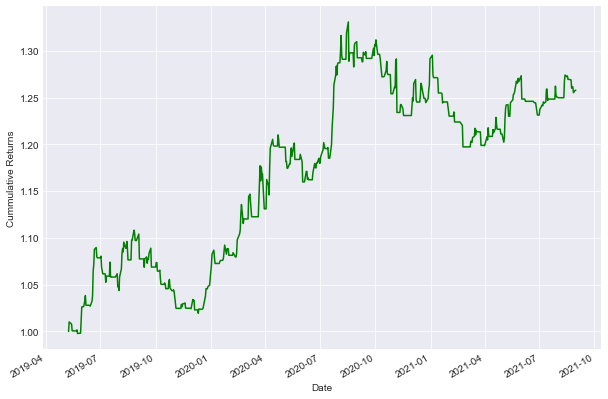

In [69]:
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
plt.ylabel("Cummulative Returns")
plt.show()

In [70]:
sharpe=gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5)
print("Sharpe Ratio %.2f" %(sharpe))

Sharpe Ratio 0.93


In [71]:
import datetime as dt
current_date=dt.datetime.now()

data=yf.download('GLD','2008-01-01',current_date,auto_adjust=True)

data['S_3']=data['Close'].rolling(window=3).mean()
data['S_9']=data['Close'].rolling(window=9).mean()
data=data.dropna()


data['predicted_gold_price']=linear.predict(data[['S_3','S_9']])
data['signal']=np.where(data.predicted_gold_price.shift(1)<data.predicted_gold_price,"Buy","No Position")

data.tail(1)[['signal','predicted_gold_price']].T

[*********************100%***********************]  1 of 1 completed


C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Date,2021-09-03
signal,Buy
predicted_gold_price,169.989
